In [9]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd


In [10]:
img_dir = '../img/'

# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('../../cache')

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None


In [11]:
# Load the session data
race = ff1.get_session(2022, 'Hungary', 'R')

# Get the laps
laps = race.load_laps(with_telemetry=True)


/home/ilias/anaconda3/lib/python3.9/site-packages/fastf1/core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Hungarian Grand Prix - Race [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '55', '11', '16', '4', '14

In [12]:
# Get laps of the drivers (LEC and RUS)
laps_driver1 = laps.pick_driver('LEC')
laps_driver2 = laps.pick_driver('RUS')

laps_driver1['RaceLapNumber'] = laps_driver1['LapNumber'] - 1
laps_driver2['RaceLapNumber'] = laps_driver2['LapNumber'] - 1


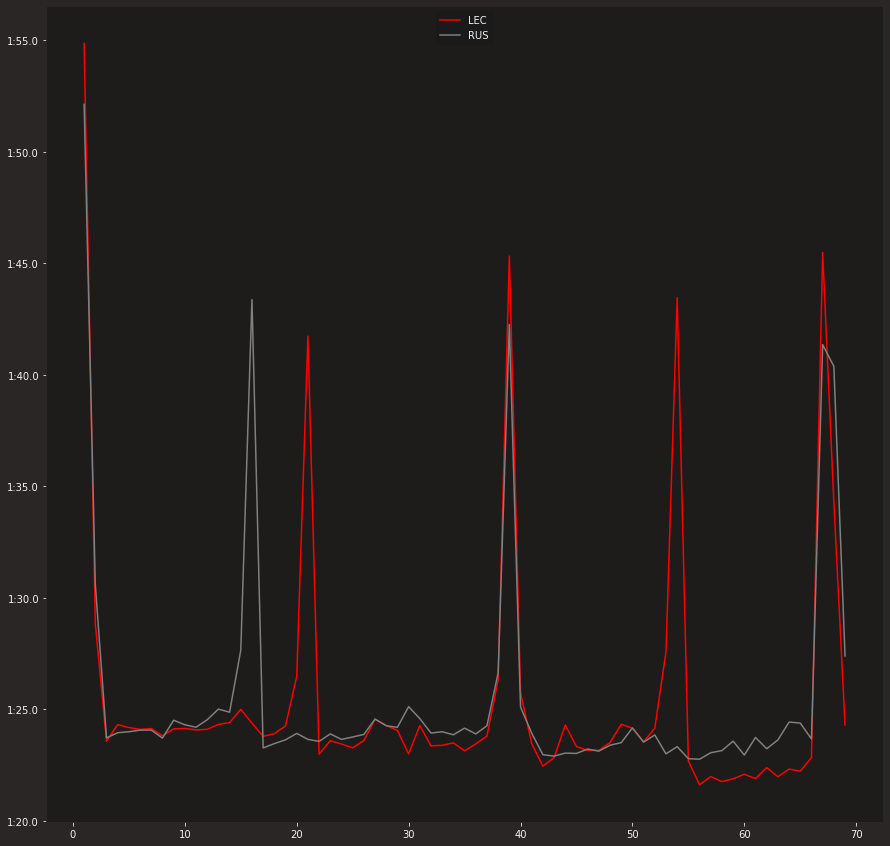

In [13]:
plt.rcParams['figure.figsize'] = [15, 15]

plt.plot(laps_driver1['RaceLapNumber'],
         laps_driver1['LapTime'], label='LEC', color='red')
plt.plot(laps_driver2['RaceLapNumber'],
         laps_driver2['LapTime'], label='RUS', color='grey')
# plt.set(ylabel='Laptime', xlabel='Lap')
plt.legend(loc="upper center")
plt.savefig(img_dir + 'race_pace_lec_rus_hungarianGP2022.png', dpi=300)
plt.show()


In [14]:
# Lap 31 Telemetry
# Get lap data
lap_telemetry_driver1 = laps_driver1.loc[laps_driver1['RaceLapNumber'] == 31] \
                                    .get_car_data().add_distance()
lap_telemetry_driver2 = laps_driver2.loc[laps_driver2['RaceLapNumber'] == 31] \
                                    .get_car_data().add_distance()

lap_telemetry_driver1['Distance'].loc[(lap_telemetry_driver1['Distance'] >= 450) & (
    lap_telemetry_driver1['Distance'] <= 600)]


23    452.467778
24    474.323333
25    505.434444
26    525.578889
27    540.912222
28    549.934444
29    558.378889
30    568.978889
31    581.512222
32    594.112222
33    599.356667
Name: Distance, dtype: float64

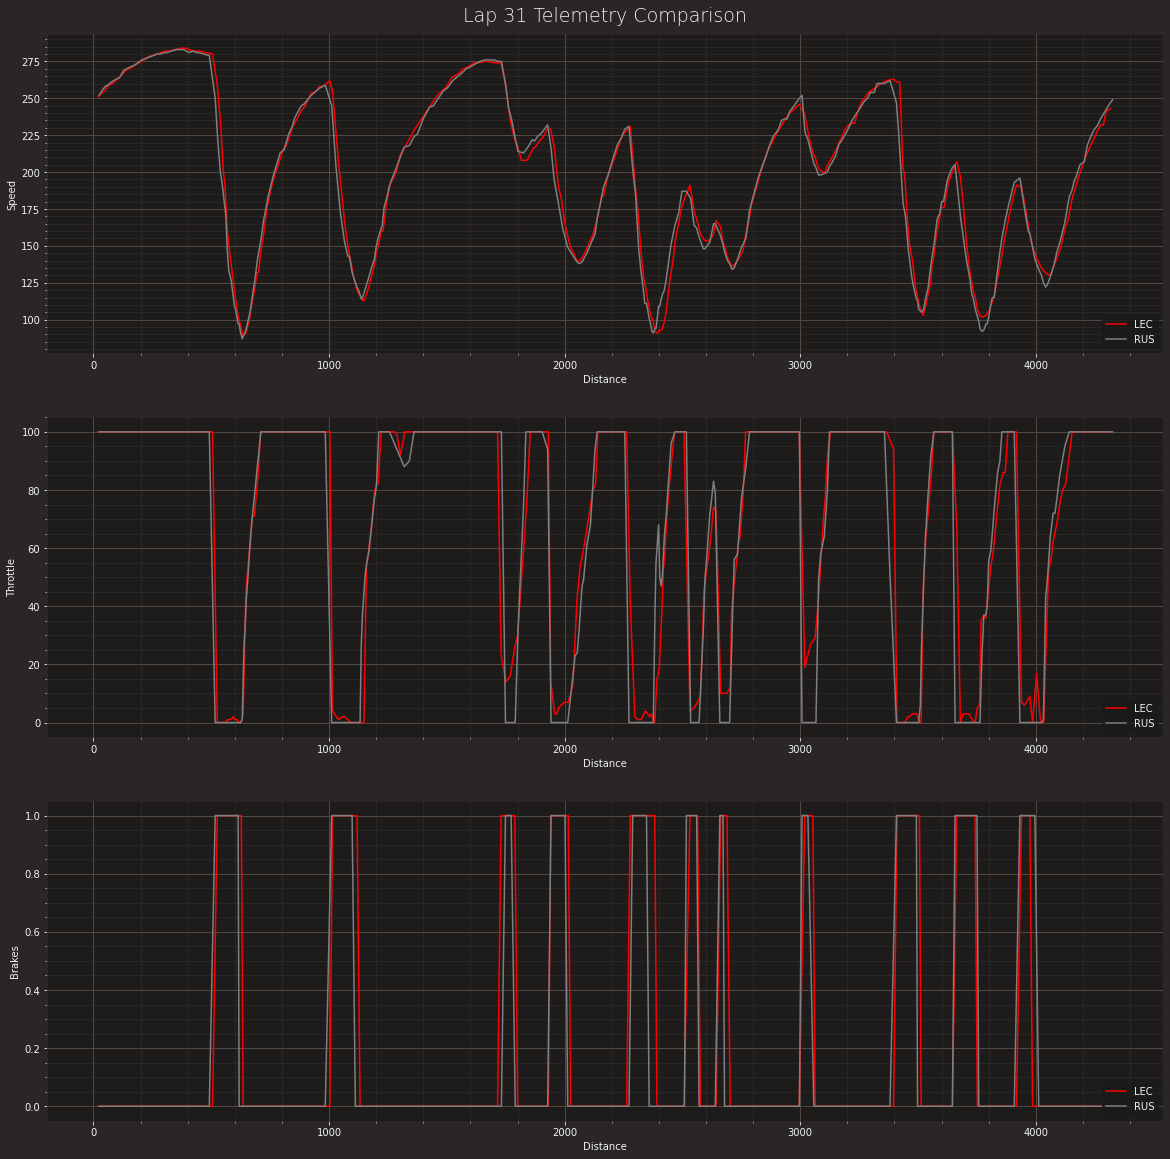

In [15]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [20, 20]

fig, ax = plt.subplots(3)
# fig.suptitle("Lap 31 Telemetry Comparison")

ax[0].title.set_text("Lap 31 Telemetry Comparison")
ax[0].plot(lap_telemetry_driver1['Distance'],
           lap_telemetry_driver1['Speed'], label='LEC', color='red')
ax[0].plot(lap_telemetry_driver2['Distance'],
           lap_telemetry_driver2['Speed'], label='RUS', color='grey')
ax[0].set(ylabel='Speed')
ax[0].set(xlabel='Distance')
ax[0].legend(loc="lower right")

ax[1].plot(lap_telemetry_driver1['Distance'],
           lap_telemetry_driver1['Throttle'], label='LEC', color='red')
ax[1].plot(lap_telemetry_driver2['Distance'],
           lap_telemetry_driver2['Throttle'], label='RUS', color='grey')
ax[1].set(ylabel='Throttle')
ax[1].set(xlabel='Distance')
ax[1].legend(loc="lower right")

ax[2].plot(lap_telemetry_driver1['Distance'],
           lap_telemetry_driver1['Brake'], label='LEC', color='red')
ax[2].plot(lap_telemetry_driver2['Distance'],
           lap_telemetry_driver2['Brake'], label='RUS', color='grey')
ax[2].set(ylabel='Brakes')
ax[2].set(xlabel='Distance')
ax[2].legend(loc="lower right")

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for a in ax.flat:
#     a.label_outer()

plt.savefig(img_dir + 'lap_31_lec_rus_hungarianGP2022.png', dpi=300)
plt.show()


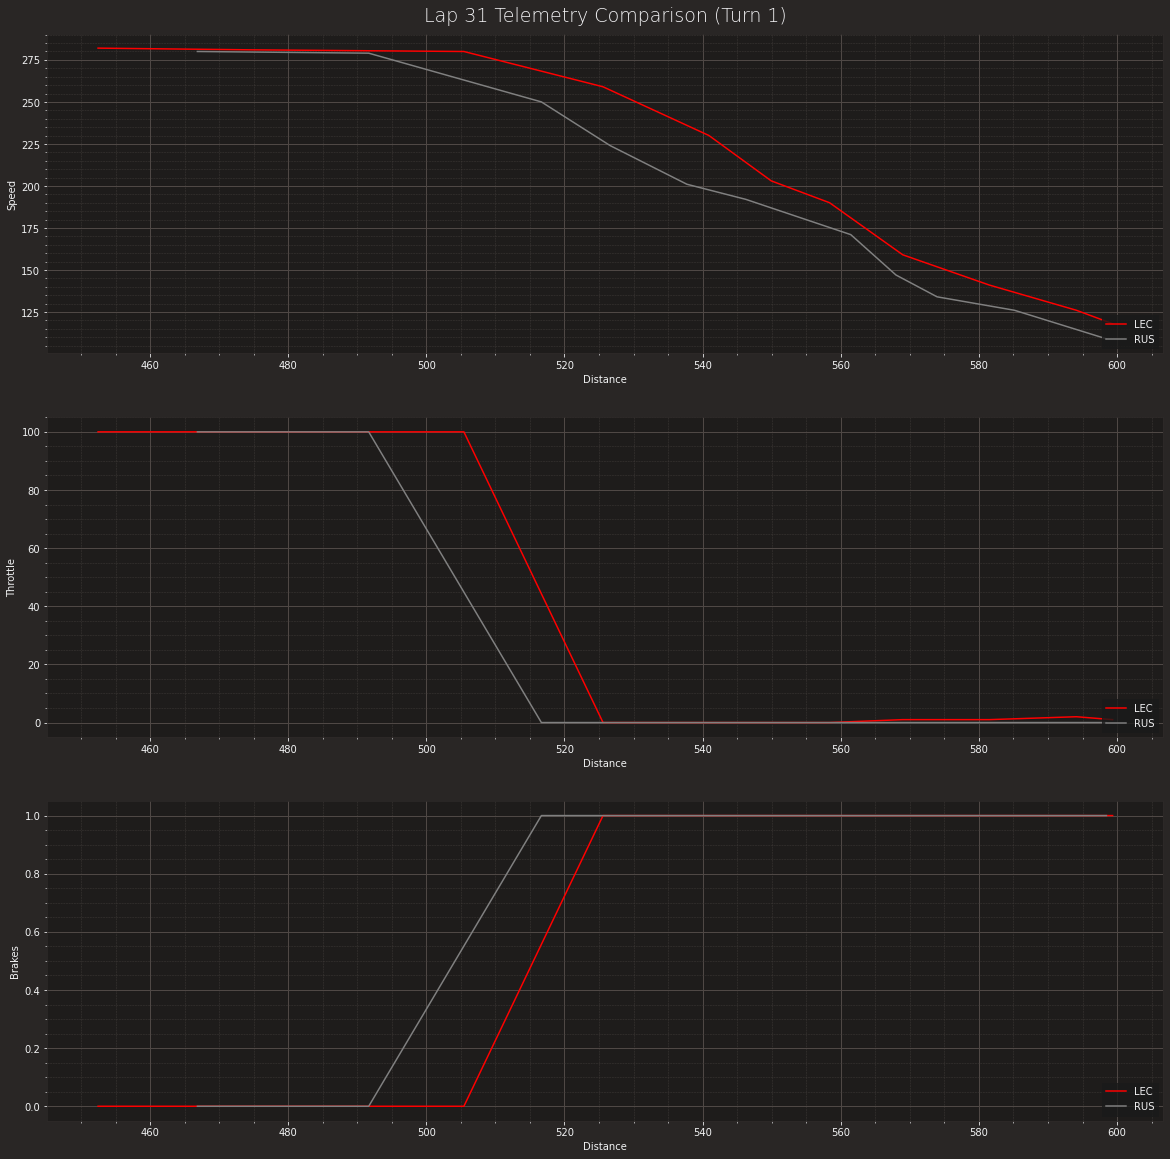

In [16]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [20, 20]

fig, ax = plt.subplots(3)
# fig.suptitle("Lap 31 Telemetry Comparison")

ax[0].title.set_text("Lap 31 Telemetry Comparison (Turn 1)")
ax[0].plot(lap_telemetry_driver1['Distance'].loc[(lap_telemetry_driver1['Distance']
                                                  >= 450) & (lap_telemetry_driver1['Distance'] <= 600)],
           lap_telemetry_driver1['Speed'].loc[(lap_telemetry_driver1['Distance']
                                               >= 450) & (lap_telemetry_driver1['Distance'] <= 600)], label='LEC', color='red')
ax[0].plot(lap_telemetry_driver2['Distance'].loc[(lap_telemetry_driver2['Distance']
                                                  >= 450) & (lap_telemetry_driver2['Distance'] <= 600)],
           lap_telemetry_driver2['Speed'].loc[(lap_telemetry_driver2['Distance']
                                               >= 450) & (lap_telemetry_driver2['Distance'] <= 600)], label='RUS', color='grey')
ax[0].set(ylabel='Speed')
ax[0].set(xlabel='Distance')
ax[0].legend(loc="lower right")

ax[1].plot(lap_telemetry_driver1['Distance'].loc[(lap_telemetry_driver1['Distance']
                                                  >= 450) & (lap_telemetry_driver1['Distance'] <= 600)],
           lap_telemetry_driver1['Throttle'].loc[(lap_telemetry_driver1['Distance']
                                                  >= 450) & (lap_telemetry_driver1['Distance'] <= 600)], label='LEC', color='red')
ax[1].plot(lap_telemetry_driver2['Distance'].loc[(lap_telemetry_driver2['Distance']
                                                  >= 450) & (lap_telemetry_driver2['Distance'] <= 600)],
           lap_telemetry_driver2['Throttle'].loc[(lap_telemetry_driver2['Distance']
                                                  >= 450) & (lap_telemetry_driver2['Distance'] <= 600)], label='RUS', color='grey')
ax[1].set(ylabel='Throttle')
ax[1].set(xlabel='Distance')
ax[1].legend(loc="lower right")

ax[2].plot(lap_telemetry_driver1['Distance'].loc[(lap_telemetry_driver1['Distance']
                                                  >= 450) & (lap_telemetry_driver1['Distance'] <= 600)],
           lap_telemetry_driver1['Brake'].loc[(lap_telemetry_driver1['Distance']
                                               >= 450) & (lap_telemetry_driver1['Distance'] <= 600)], label='LEC', color='red')
ax[2].plot(lap_telemetry_driver2['Distance'].loc[(lap_telemetry_driver2['Distance']
                                                  >= 450) & (lap_telemetry_driver2['Distance'] <= 600)],
           lap_telemetry_driver2['Brake'].loc[(lap_telemetry_driver2['Distance']
                                               >= 450) & (lap_telemetry_driver2['Distance'] <= 600)], label='RUS', color='grey')
ax[2].set(ylabel='Brakes')
ax[2].set(xlabel='Distance')
ax[2].legend(loc="lower right")

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for a in ax.flat:
#     a.label_outer()

plt.savefig(img_dir + 'lap_31_lec_rus_overtake_hungarianGP2022.png', dpi=300)
plt.show()
